In [1]:
R.version
# install.packages('spls')

               _                           
platform       x86_64-w64-mingw32          
arch           x86_64                      
os             mingw32                     
system         x86_64, mingw32             
status                                     
major          3                           
minor          6.1                         
year           2019                        
month          07                          
day            05                          
svn rev        76782                       
language       R                           
version.string R version 3.6.1 (2019-07-05)
nickname       Action of the Toes          

In [27]:
# install.packages("collections")

library('spls')
library('dplyr')
library('readxl')
library('collections')

# Sunduz Keles' paper: https://rss.onlinelibrary.wiley.com/doi/10.1111/j.1467-9868.2009.00723.x

# https://cran.r-project.org/web/packages/spls/vignettes/spls-example.pdf
# https://cran.r-project.org/web/packages/spls/spls.pdf

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



### Notes from vignette
1. Predictors are centered and scaled automatically as part of pre-processing in spls
2. Input X as matrix and Y as matrix or vector
3. Hyperparameter tuning:
    1. eta = sparsity param
        - value between 0 and 1
    2. K = num. hidden components
        - Between 1 and min(p, (v-1)n/v)
    - Use v-fold CV function in cv.spls 
    -`set.seed(1)
    cv <- cv.spls( yeast$x, yeast$y, eta = seq(0.1,0.9,0.1), K = c(5:10) )`
    
4. Fitting
    - spls function does the fit
    - `fit <- spls( yeast$x, yeast$y, eta = cv$eta.opt, K = cv$K.opt )`
    - spls prints out variables that enter the set of selected variables at each iteration step of fitting.
    - `print.spls` displays parameters used, num. predictors and list of predictors
    - `print(coef(fit))` prints out the coefficient estimates

5. Coef path plot
    - `plot.spls(f, yvar=1)`
    
__In the yeast cell cycle data [Example used in vignette], the responses were repeatedly measured at different time points.__
In this case, it is useful to visualize how the estimated coefficients change as a function of time.
The function ‘coefplot.spls’ plots the estimated coefficients of the fit obtained from the ‘spls’
function across all the responses.

In [6]:
data(yeast)
yeast$x
yeast$y

,ABF1_YPD,ACE2_YPD,ADR1_YPD,ARG80_YPD,ARG81_YPD,ARO80_YPD,ASH1_YPD,AZF1_YPD,BAS1_YPD,CAD1_YPD,...,UGA3_YPD,YAP1_YPD,YAP3_YPD,YAP5_YPD,YAP6_YPD,YAP7_YPD,YFL044C_YPD,YJL206C_YPD,ZAP1_YPD,ZMS1_YPD
21,-0.272273021,0.219322937,0.9238359567,-0.475575615,-0.10389318,0.2684020538,0.242154919,-0.086738577,-0.2576373559,0.144634164,...,-0.406067794,-0.25571576,0.148216319,0.615101262,3.874595e-01,-0.7690857522,0.91080587,0.48183221,-0.358274829,-0.019354076
41,0.169128029,0.538311983,0.0097604993,-0.321953432,-0.19750606,-0.0191319878,0.687699365,0.138874089,-0.1335776877,-0.735599624,...,-0.986433262,-0.18086054,0.013226979,-0.642500626,2.490926e-02,-0.4573304557,-0.25902208,-0.23575669,-0.383033883,0.211907571
71,-0.138896200,0.026363822,0.0877516229,-0.223409276,0.10307741,0.3214393424,-0.171224968,0.425708505,0.1071858178,0.096391811,...,0.828472113,0.17842821,-0.006725961,0.105255263,-5.787689e-02,0.4416244489,0.85500793,-0.03926345,0.286199727,0.238056769
78,-0.286516858,-0.314094270,-0.0454998435,0.326221738,0.27757502,-0.0317175012,0.257551497,-0.014661977,0.0616182009,0.003613174,...,-2.135487947,-0.52453268,0.034463376,-0.377618708,3.586077e-02,-0.4860690242,-0.03762481,0.07295395,-0.036167940,0.150705368
102,-0.495056114,-0.148274190,0.0002987512,-0.217945828,-0.02539585,-0.2515847107,0.263647902,0.190925299,-0.0001811129,-0.211715962,...,-1.222013658,0.01964698,0.062165932,-0.416812933,5.337454e-02,-0.4951472291,-0.35444051,0.09640220,0.009643994,0.539917029
106,-0.160078262,-0.534380704,-0.0762426763,-0.003138850,0.15052029,0.0072565096,0.413633832,0.159577651,0.1748477888,-0.561663048,...,-0.879180554,0.57013627,-0.339223827,-0.681928289,5.384423e-01,-0.4187082842,-0.57661333,-0.05569781,0.090434514,0.553884104
107,-0.160078262,-0.534380704,-0.0762426763,-0.003138850,0.15052029,0.0072565096,0.413633832,0.159577651,0.1748477888,-0.561663048,...,-0.879180554,0.57013627,-0.339223827,-0.681928289,5.384423e-01,-0.4187082842,-0.57661333,-0.05569781,0.090434514,0.553884104
136,0.357042059,-0.402079621,0.1350669851,-0.587817395,-0.29032284,-0.0697538489,0.495677973,0.051935704,-0.3722889741,-0.388217123,...,-1.242254835,-0.64913836,-0.323575078,-0.513131878,1.005579e+00,-0.1146162011,-0.56973740,-0.49882836,-0.275869699,0.481338109
158,-0.052456564,0.260383183,0.0608546518,-0.176799930,-0.10878565,-0.0019623750,-0.033218692,0.257249881,0.0726635576,-0.007561527,...,-0.805245578,-0.67093801,0.295487355,0.803795322,-1.416249e-01,0.0007967247,-0.17687493,0.02937160,0.083038770,0.301258686
168,-0.064340936,0.556953473,0.4160845879,0.290826250,0.03905541,-0.0071430528,-0.017261212,0.208993876,-0.1542338291,0.166068047,...,0.215696983,0.19700719,-0.058026905,0.012305925,1.124071e-02,-0.8576207820,0.09410511,0.08690521,-0.148106879,-0.422436924


,alpha0,alpha7,alpha14,alpha21,alpha28,alpha35,alpha42,alpha49,alpha56,alpha63,alpha70,alpha77,alpha84,alpha91,alpha98,alpha105,alpha112,alpha119
1,-0.36,-0.42,0.29,-0.14,-0.19,-0.52,0.04,0.04,0.37,0.24,0.13,0.22,0.04,-0.24,-0.22,-0.10,0.22,0.61
2,1.04,0.19,0.47,-1.03,-0.63,-0.68,0.10,-0.02,0.53,0.68,0.51,-0.20,-0.34,-0.59,-0.31,-0.25,0.11,0.44
5,-0.30,-0.45,0.75,0.37,0.27,-0.28,-0.16,-0.13,-0.56,-0.28,0.11,0.30,0.22,0.08,0.07,-0.02,0.11,-0.10
8,-0.46,0.12,-0.06,-0.76,-0.70,-0.79,-0.20,-0.06,0.82,0.36,0.68,-0.13,0.20,-0.32,0.04,0.57,0.17,0.53
9,-1.35,-0.86,-0.22,-0.38,-0.65,-0.79,0.02,0.60,1.38,1.59,1.03,0.99,0.11,-0.39,-0.86,-0.41,-0.20,0.41
10,-2.06,-1.98,-1.64,-0.21,1.21,0.69,0.85,0.43,-0.32,-0.77,-1.10,-0.02,0.88,1.30,1.29,1.29,0.16,0.00
11,-1.61,-2.55,-1.09,-0.55,0.98,1.14,0.90,0.43,-0.41,-0.38,-1.18,-0.16,0.77,1.27,1.17,1.30,0.05,-0.09
14,-0.07,-0.46,0.41,0.16,0.58,-0.07,0.45,0.04,0.07,-0.07,-0.08,-0.28,-0.09,-0.08,0.16,-0.35,0.02,-0.35
16,0.11,-0.54,-0.45,-0.23,-0.14,0.39,0.15,0.15,0.02,0.17,-0.38,-0.14,-0.06,0.17,0.11,0.07,0.37,0.23
17,0.15,-0.07,-0.09,0.00,0.02,-0.46,-0.11,-0.14,-0.02,0.03,-0.03,0.41,0.13,0.11,0.10,0.03,-0.12,0.05


eta = 0.1 
eta = 0.2 
eta = 0.3 
eta = 0.4 
eta = 0.5 
eta = 0.6 
eta = 0.7 
eta = 0.8 
eta = 0.9 

Optimal parameters: eta = 0.6, K = 8


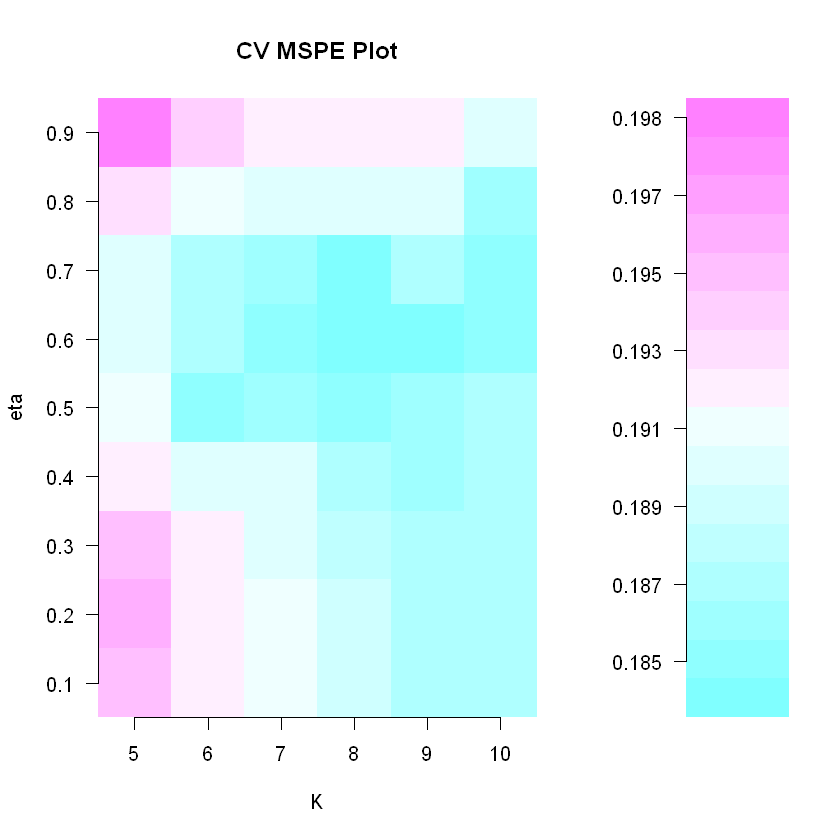

In [10]:
# This CV on the yeast data takes about 15 seconds. 
set.seed(1)
cv <- cv.spls(yeast$x, yeast$y, eta = seq(0.1,0.9,0.1), K = c(5:10), fold = 10)

In [140]:
f <- spls( yeast$x, yeast$y, eta = cv$eta.opt, K = cv$K.opt )

In [144]:
print.spls(f)


Sparse Partial Least Squares for multivariate responses
----
Parameters: eta = 0.7, K = 6, kappa = 0.5
PLS algorithm:
pls2 for variable selection, simpls for model fitting

SPLS chose 19 variables among 106 variables

Selected variables: 
AZF1_YPD	FHL1_YPD	FKH2_YPD	GAT3_YPD	GCR1_YPD	
HAP2_YPD	HIR1_YPD	MBP1_YPD	MCM1_YPD	MET4_YPD	
MSN2_YPD	NDD1_YPD	PHD1_YPD	RME1_YPD	STE12_YPD	
SWI4_YPD	SWI5_YPD	SWI6_YPD	YAP5_YPD	


In [146]:
print(coef(f))

                     alpha0      alpha7      alpha14       alpha21     alpha28
ABF1_YPD        0.000000000  0.00000000  0.000000000  0.0000000000  0.00000000
ACE2_YPD        0.000000000  0.00000000  0.000000000  0.0000000000  0.00000000
ADR1_YPD        0.000000000  0.00000000  0.000000000  0.0000000000  0.00000000
ARG80_YPD       0.000000000  0.00000000  0.000000000  0.0000000000  0.00000000
ARG81_YPD       0.000000000  0.00000000  0.000000000  0.0000000000  0.00000000
ARO80_YPD       0.000000000  0.00000000  0.000000000  0.0000000000  0.00000000
ASH1_YPD        0.000000000  0.00000000  0.000000000  0.0000000000  0.00000000
AZF1_YPD        0.029955809  0.03963556  0.021648363 -0.0040931684 -0.03138764
BAS1_YPD        0.000000000  0.00000000  0.000000000  0.0000000000  0.00000000
CAD1_YPD        0.000000000  0.00000000  0.000000000  0.0000000000  0.00000000
CBF1_YPD        0.000000000  0.00000000  0.000000000  0.0000000000  0.00000000
CHA4_YPD        0.000000000  0.00000000  0.000000000

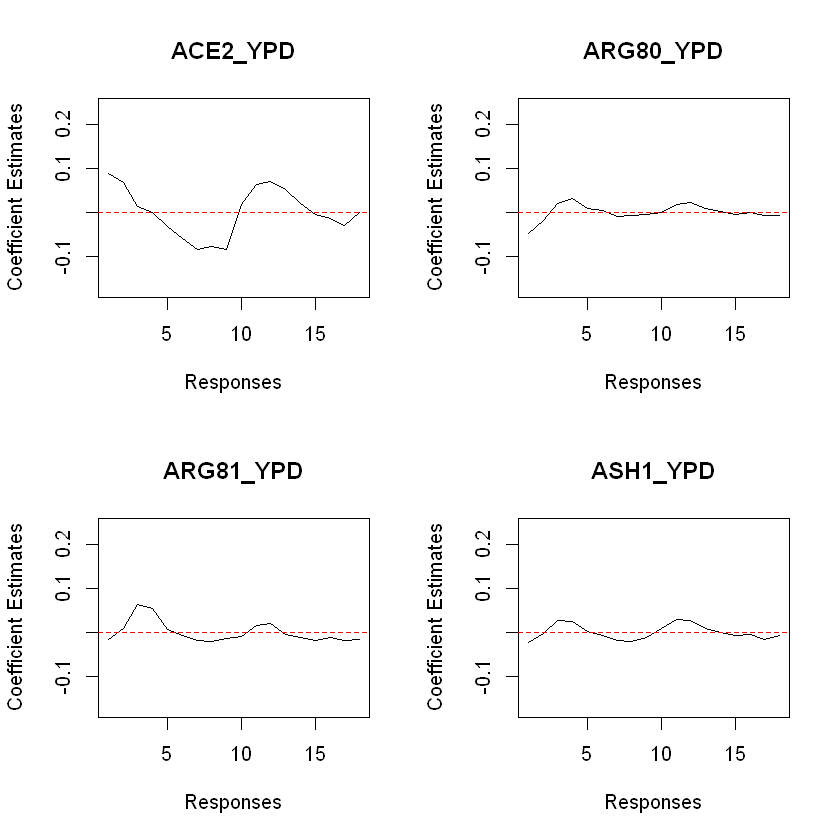

In [38]:
coefplot.spls( f, nwin=c(2,2), xvar=c(1:4) )

## Wrangling data into R

In [133]:
animals_used <- c(1091, 1093, 1060, 1062, 1074, 1092, 1102, 1076, 1082, 1101)
diabetic <-     c(1076, 1082, 1101)
impaired <-     c(1060, 1062, 1074, 1092, 1102)
normal  <-      c(1091, 1093)
# animal_tol = {
#     1076: 'diabetic', 1082: 'diabetic', 1101: 'diabetic', 1060: 'impaired', 1062: 'impaired', 
#     1074: 'impaired', 1092: 'impaired', 1102: 'impaired', 1091: 'normal', 1093: 'normal'}
ap <- read.csv('..\\data\\metadata\\animal_phenotypes.csv', 
               fileEncoding="UTF-8-BOM",
#                encoding='UTF-8',
#                row.names='animal'
               check.names=FALSE,  # check.names=FALSE prevents R from changing column names to R-friendly strings
               row.names='animal',
              )
# rownames(ap) <- ap$animal
fg <- read.csv('..\\data\\metadata\\combined_metab_lipid_file_grouping.csv')
mydata <- read.csv('..\\data\\processed\\combined_metabolites_data.csv', 
                   row.names='i',
                   check.names=FALSE,)

y_ogtt <- read.csv('..\\data\\processed\\y_ogtt.csv', row.names='combined_col_name')
data_cols <- select(mydata, rownames(y_ogtt))
data_cols <- t(data_cols)
# y_ogtt <- t(y_ogtt)

In [128]:
y_ogtt

,1091_8_FBG,1091_9_FBG,1091_10_FBG,1093_8_FBG,1093_9_FBG,1093_10_FBG,1060_8_FBG,1060_9_FBG,1060_10_FBG,1062_8_FBG,...,1102_10_RBG,1076_8_RBG,1076_9_RBG,1076_10_RBG,1082_8_RBG,1082_9_RBG,1082_10_RBG,1101_8_RBG,1101_9_RBG,1101_10_RBG
ogtt,846.75,846.75,846.75,993,993,993,1761.75,1761.75,1761.75,1648.75,...,1738.25,2321.25,2321.25,2321.25,2224.75,2224.75,2224.75,2015.75,2015.75,2015.75


In [154]:
c(5:10)

[1]  5  6  7  8  9 10

eta = 0.1 
eta = 0.2 
eta = 0.3 
eta = 0.4 
eta = 0.5 
eta = 0.6 
eta = 0.7 
eta = 0.8 
eta = 0.9 

Optimal parameters: eta = 0.7, K = 6


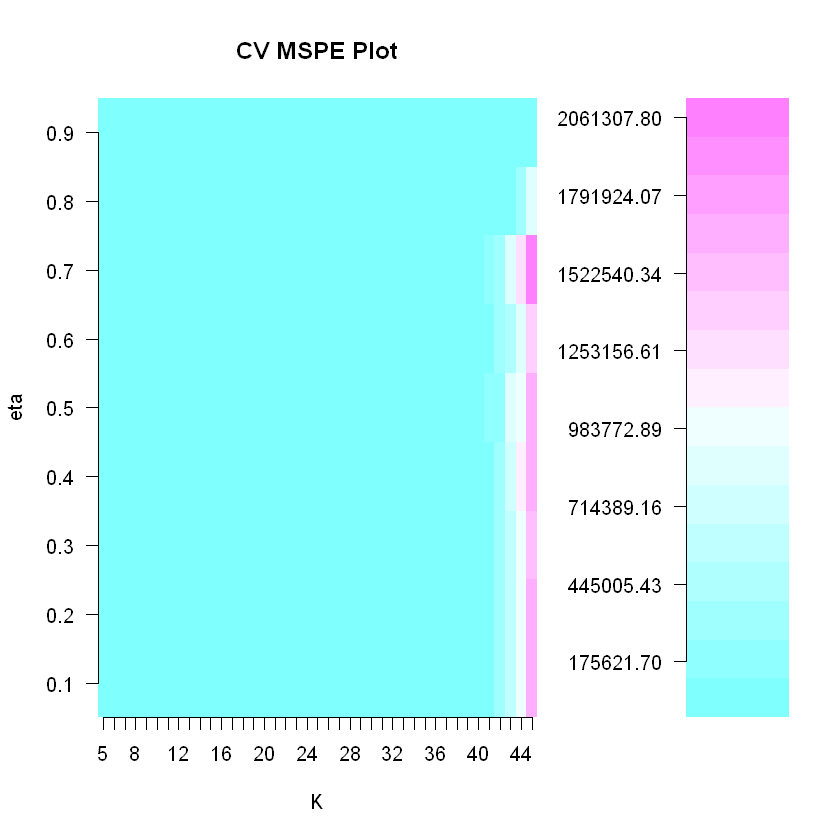

In [156]:
set.seed(1)
cv <- cv.spls(data_cols, y_ogtt, eta = seq(0.1,0.9,0.1), K = c(5:45), fold = 10)

In [158]:
# spls function does the fit
fit <- spls(data_cols, y_ogtt, eta = cv$eta.opt, K = cv$K.opt)
# spls prints out variables that enter the set of selected variables at each iteration step of fitting.
# print.spls displays parameters used, num. predictors and list of predictors
# 

In [159]:
fit


Sparse Partial Least Squares for an univariate response
----
Parameters: eta = 0.7, K = 6
PLS algorithm:
pls2 for variable selection, simpls for model fitting

SPLS chose 462 variables among 1727 variables

Selected variables: 
l_3	l_43	l_45	l_63	l_68	
l_69	l_80	l_81	l_83	l_90	
l_94	l_100	l_107	l_111	l_121	
l_123	l_124	l_133	l_136	l_138	
l_139	l_142	l_145	l_146	l_149	
l_150	l_151	l_152	l_153	l_155	
l_161	l_160	l_163	l_164	l_165	
l_170	l_171	l_173	l_174	l_175	
l_177	l_178	l_179	l_180	l_181	
l_186	l_188	l_189	l_191	l_199	
l_203	l_204	l_208	l_209	l_210	
l_212	l_213	l_214	l_215	l_221	
l_225	l_229	l_231	l_236	l_237	
l_244	l_243	l_246	l_247	l_250	
l_251	l_253	l_262	l_267	l_270	
l_272	l_278	l_284	l_287	l_293	
l_295	l_299	l_316	l_318	l_327	
l_334	l_335	l_355	l_361	l_364	
l_368	l_383	l_390	l_391	l_394	
l_409	l_410	l_413	l_414	l_417	
l_418	l_419	l_421	l_436	l_440	
l_442	l_456	l_457	l_459	l_463	
l_465	l_467	l_481	l_497	l_502	
l_505	l_507	l_509	l_523	l_531	
l_538	l_540	l_541	l_545	l_550	
l_555	l_

In [160]:
print(coef(fit))

               [,1]
l_0      0.00000000
l_1      0.00000000
l_2      0.00000000
l_3     -7.60616724
l_4      0.00000000
l_5      0.00000000
l_6      0.00000000
l_7      0.00000000
l_8      0.00000000
l_9      0.00000000
l_10     0.00000000
l_11     0.00000000
l_12     0.00000000
l_13     0.00000000
l_14     0.00000000
l_15     0.00000000
l_16     0.00000000
l_17     0.00000000
l_18     0.00000000
l_19     0.00000000
l_20     0.00000000
l_21     0.00000000
l_24     0.00000000
l_22     0.00000000
l_23     0.00000000
l_25     0.00000000
l_26     0.00000000
l_28     0.00000000
l_27     0.00000000
l_29     0.00000000
l_30     0.00000000
l_33     0.00000000
l_31     0.00000000
l_32     0.00000000
l_35     0.00000000
l_34     0.00000000
l_36     0.00000000
l_37     0.00000000
l_38     0.00000000
l_39     0.00000000
l_40     0.00000000
l_41     0.00000000
l_42     0.00000000
l_43   -16.26534374
l_44     0.00000000
l_45     7.78327382
l_46     0.00000000
l_47     0.00000000
l_48     0.00000000


In [162]:
fit


Sparse Partial Least Squares for an univariate response
----
Parameters: eta = 0.7, K = 6
PLS algorithm:
pls2 for variable selection, simpls for model fitting

SPLS chose 462 variables among 1727 variables

Selected variables: 
l_3	l_43	l_45	l_63	l_68	
l_69	l_80	l_81	l_83	l_90	
l_94	l_100	l_107	l_111	l_121	
l_123	l_124	l_133	l_136	l_138	
l_139	l_142	l_145	l_146	l_149	
l_150	l_151	l_152	l_153	l_155	
l_161	l_160	l_163	l_164	l_165	
l_170	l_171	l_173	l_174	l_175	
l_177	l_178	l_179	l_180	l_181	
l_186	l_188	l_189	l_191	l_199	
l_203	l_204	l_208	l_209	l_210	
l_212	l_213	l_214	l_215	l_221	
l_225	l_229	l_231	l_236	l_237	
l_244	l_243	l_246	l_247	l_250	
l_251	l_253	l_262	l_267	l_270	
l_272	l_278	l_284	l_287	l_293	
l_295	l_299	l_316	l_318	l_327	
l_334	l_335	l_355	l_361	l_364	
l_368	l_383	l_390	l_391	l_394	
l_409	l_410	l_413	l_414	l_417	
l_418	l_419	l_421	l_436	l_440	
l_442	l_456	l_457	l_459	l_463	
l_465	l_467	l_481	l_497	l_502	
l_505	l_507	l_509	l_523	l_531	
l_538	l_540	l_541	l_545	l_550	
l_555	l_

10 % completed...
20 % completed...
30 % completed...
40 % completed...
50 % completed...
60 % completed...
70 % completed...
80 % completed...
90 % completed...
100 % completed...


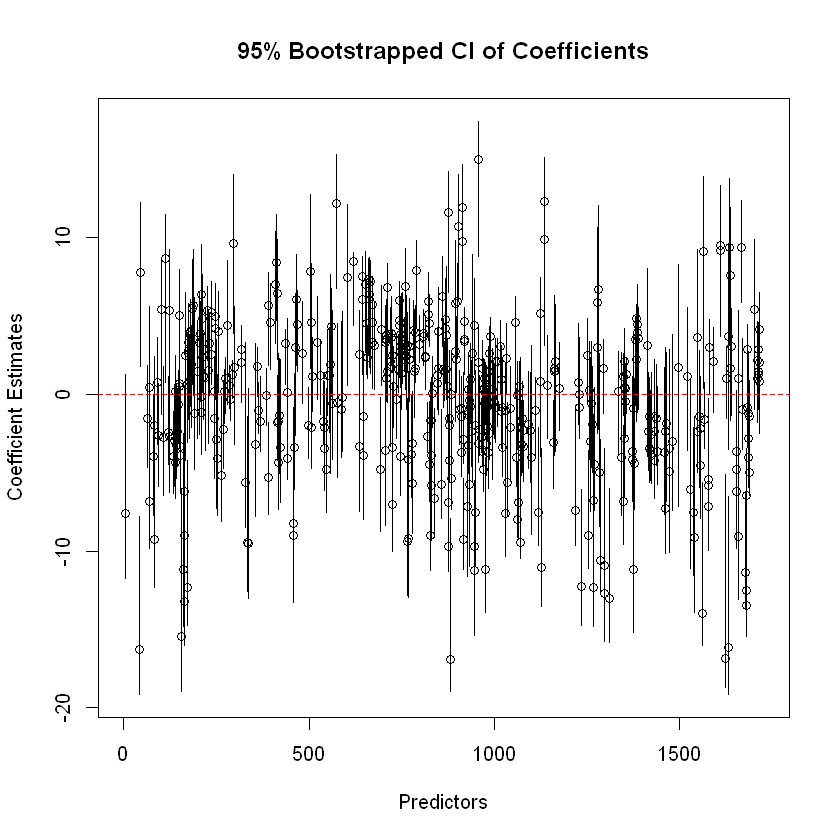

In [167]:
set.seed(1)
conf_int <- ci.spls(fit, plot.it=TRUE, plot.fix='y', plot.var=1)

In [176]:
cis <- conf_int$cibeta
(cis$ogtt)

,2.5%,97.5%
l_3,-11.7645613,1.278168569
l_43,-19.1512732,-7.794941082
l_45,1.8058803,12.256728406
l_63,-4.6668099,1.829889544
l_68,-9.8287597,-3.126225109
l_69,-6.7906751,5.623164687
l_80,-7.7355855,-0.006207556
l_81,-12.3301201,-1.813445569
l_83,-7.6980469,2.450165499
l_90,-3.2039472,3.641197899


In [195]:
c(5:7) == c(5, 6, 7)

[1] TRUE TRUE TRUE

In [179]:
for (i in dev.list()[1]:dev.list()[length(dev.list())]) {
   dev.off()
}


In [180]:
corrected <- correct.spls(conf_int)

In [194]:
corr <- as.data.frame(corrected)
length(corr[corr$V1 != 0, ])

[1] 195

In [183]:
corrected[corrected$]

ERROR: Error in parse(text = x, srcfile = src): <text>:1:21: unexpected ']'
1: corrected[corrected$]
                        ^
